In [2]:
import os
import pandas as pd
import numpy as np

import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read results

In [3]:

logs_dir = './logs/modeldata'
all_files = os.listdir(logs_dir)

csv_files = [file for file in all_files ]

print(csv_files)
#csv_files=['_May11_14_39_59_.csv']
csv_files=['_May06_20_45_05_.csv','_April16_16_41_25_.csv','_May20_14_13_00_.csv']
#csv_files=[csv_files[0],csv_files[-1]]
print(csv_files)


['_April04_17_16_55_.csv', '_April06_13_56_06_.csv', '_April10_13_36_44_.csv', '_April16_16_41_25_.csv', '_April23_14_41_54_.csv', '_April24_19_14_20_.csv', '_April25_13_41_37_.csv', '_April26_10_09_42_.csv', '_April27_16_36_32_.csv', '_March21_10_50_01_.csv', '_March29_18_58_37_.csv', '_May06_20_45_05_.csv', '_May11_14_39_59_.csv', '_May17_12_08_49_.csv', '_May20_14_13_00_.csv', '_May24_19_03_47_.csv', '_May24_19_06_07_.csv', '_May24_19_06_25_.csv', '_May24_19_07_16_.csv', '_May24_19_08_38_.csv']
['_May06_20_45_05_.csv', '_April16_16_41_25_.csv', '_May20_14_13_00_.csv']


# Box plot

In [4]:
dataframes = []
for file in csv_files:
    file_path = os.path.join(logs_dir, file)
    print(file_path)
    df = pd.read_csv(file_path)
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)
print(df)

./logs/modeldata\_May06_20_45_05_.csv
./logs/modeldata\_April16_16_41_25_.csv
./logs/modeldata\_May20_14_13_00_.csv
      test accuracy    recall  precision  trainingset_size             type  \
0         72.936259  0.388176   0.603643               500  active learning   
1         74.155347  0.514780   0.600520              1000  active learning   
2         78.718217  0.596207   0.682195              1500  active learning   
3         80.024382  0.576129   0.727465              2000  active learning   
4         80.424939  0.510318   0.788114              2500  active learning   
...             ...       ...        ...               ...              ...   
1495      81.344713  0.481502   0.868526              3000  active learning   
1496      81.153109  0.625069   0.737459              3500  active learning   
1497      80.247344  0.552181   0.755858              4000  active learning   
1498      82.529176  0.592490   0.801943              4500  active learning   
1499      82.87

# Influence model architecture

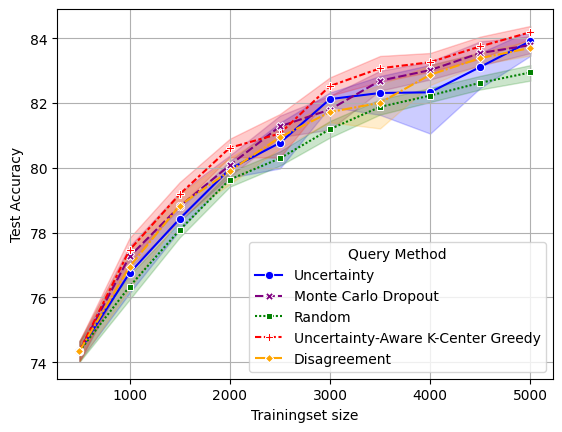

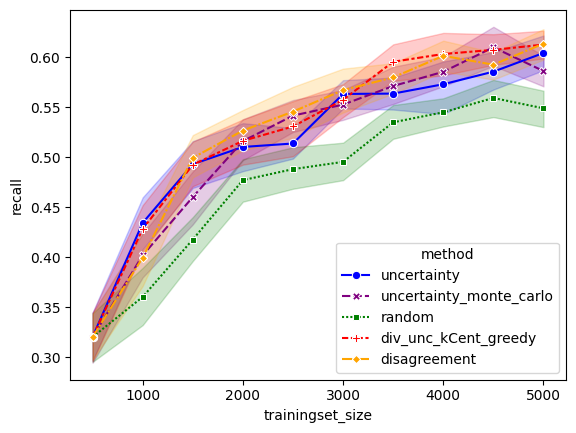

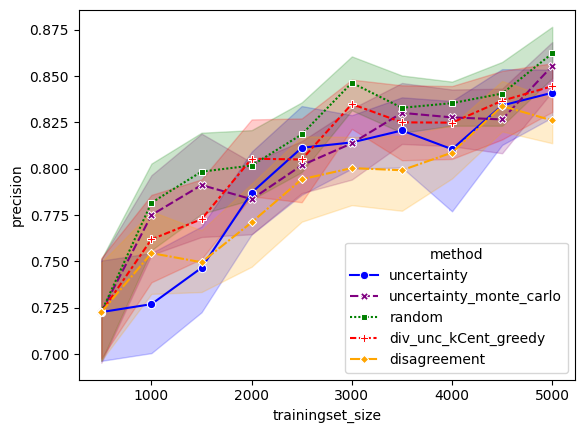

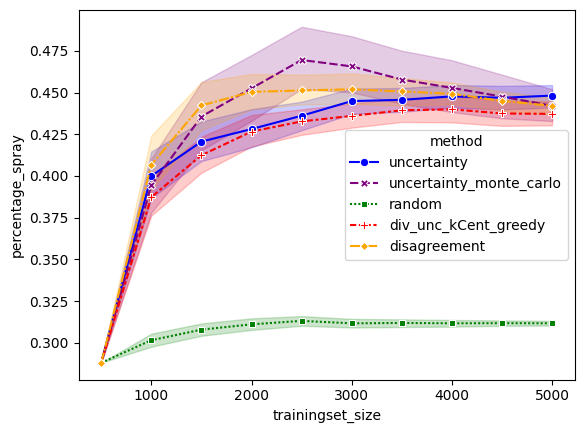

'\nfor i in range(10):\n\n    sns.lineplot(data=df[df[\'seed\'] == i], x="trainingset_size", y="test accuracy", hue="method",palette=palette)\n    plt.show()\n'

In [10]:
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']

palette = {
    'div_unc_kCent_greedy': 'red',   
    'uncertainty': 'blue',
    'random': 'green',
   'uncertainty_monte_carlo': 'purple',
   'disagreement': 'orange',
   
}
df['method'] = df['method'].replace('divers_uncer_kCent_greedy', 'div_unc_kCent_greedy')
value_replacements = {
    'div_unc_kCent_greedy': 'Uncertainty-Aware K-Center Greedy',   
    'uncertainty': 'Uncertainty',
    'random': 'Random',
   'uncertainty_monte_carlo': 'Monte Carlo Dropout',
   'disagreement': 'Disagreement'
}


fig=sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method",palette=palette,style='method',markers=True)
handles, labels = fig.get_legend_handles_labels()
new_labels = [value_replacements.get(label, label) for label in labels]
fig.legend(handles, new_labels, title="Query Method")
plt.xlabel('Trainingset size')
plt.ylabel('Test Accuracy')
plt.grid(True) 
plt.show()

sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method",palette=palette,style='method',markers=True)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method",palette=palette,style='method',markers=True)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method",palette=palette,style='method',markers=True)
plt.show()
"""
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method",palette=palette)
    plt.show()
"""
#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")



Print table with mean and t-test 95%intervals in latex format

In [9]:
from scipy import stats
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']


df_filtered = df[df['trainingset_size'] == 5000]

summary_stats = df_filtered.groupby('method').agg(
    mean_accuracy=('test accuracy', 'mean'),
    std_accuracy=('test accuracy', 'std'),
    count=('test accuracy', 'count')
).reset_index()

summary_stats['confidence_interval'] = summary_stats.apply(
    lambda row: stats.t.ppf(1 - (1 - 0.95) / 2, df=row['count'] - 1) * row['std_accuracy'] / np.sqrt(row['count']), axis=1
)

summary_stats['lower_bound'] = summary_stats['mean_accuracy'] - summary_stats['confidence_interval']
summary_stats['upper_bound'] = summary_stats['mean_accuracy'] + summary_stats['confidence_interval']

value_replacements = {
    'div_unc_kCent_greedy': 'Uncertainty-Aware K-Center Greedy',
    'uncertainty': 'Uncertainty',
    'random': 'Random',
    'uncertainty_monte_carlo': 'Monte Carlo Dropout',
    'disagreement': 'Disagreement'
}

summary_stats['method'] = summary_stats['method'].replace(value_replacements)

summary_stats_sorted = summary_stats.sort_values(by='mean_accuracy', ascending=False)


summary_stats_sorted['accuracy_with_error'] = summary_stats_sorted.apply(
    lambda row: f"{row['mean_accuracy']:.2f} $\\pm$ {(row['confidence_interval']):.2f}", axis=1
)


latex_df_final_sorted = summary_stats_sorted[['method', 'accuracy_with_error']]


latex_table_final_sorted = latex_df_final_sorted.to_latex(index=False, header=['Query Method', 'Accuracy at 5000'], escape=False)
print(latex_table_final_sorted)


\begin{tabular}{ll}
\toprule
Query Method & Accuracy at 5000 \\
\midrule
Uncertainty-Aware K-Center Greedy & 84.19 $\pm$ 0.21 \\
Uncertainty & 83.91 $\pm$ 0.44 \\
Monte Carlo Dropout & 83.78 $\pm$ 0.27 \\
Disagreement & 83.70 $\pm$ 0.25 \\
Random & 82.94 $\pm$ 0.25 \\
\bottomrule
\end{tabular}



# Influence preprocessing

## Masking vs pixel remapping

In [7]:
def calculate_f1_scores(row):
    precision_A = row['precision']
    recall_A = row['recall']
    class_ratio_A = 0.31
    N_A = class_ratio_A
    N_B = 1 - class_ratio_A
    TP_A = recall_A * N_A
    FN_A = N_A - TP_A
    FP_A = (TP_A / precision_A) - TP_A
    TN_A = N_B - FP_A
    precision_B = TN_A / (TN_A + FN_A)
    recall_B = TN_A / (TN_A + FP_A)
    f1_A = 2 * (precision_A * recall_A) / (precision_A + recall_A)
    f1_B = 2 * (precision_B * recall_B) / (precision_B + recall_B)
    return pd.Series({'f1_A': f1_A, 'f1_B': f1_B})

df[['f1_spray', "f1_don't"]] = df.apply(calculate_f1_scores, axis=1)

## Crop remap interpolation

Procedure:

* Crop rectangle in frame
* Remap pixels in trapezoid to square

Check influence of interpolation type during remap on the accuracy

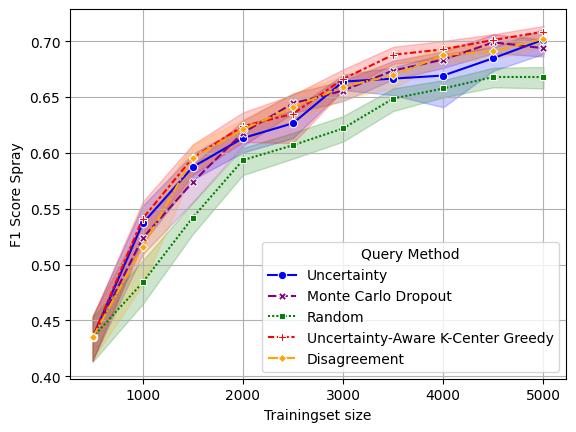

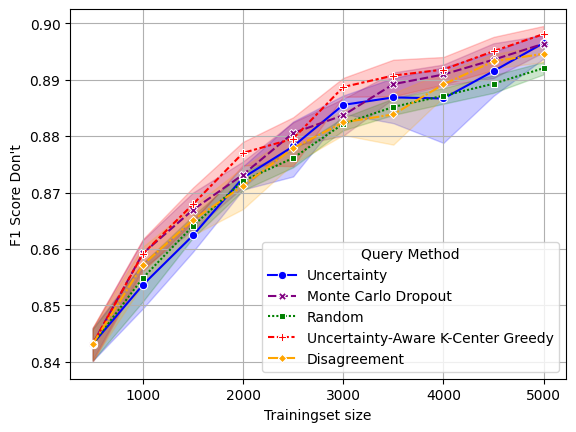

In [8]:
fig=sns.lineplot(data=df, x="trainingset_size", y="f1_spray", hue="method",palette=palette,style='method',markers=True)
handles, labels = fig.get_legend_handles_labels()
new_labels = [value_replacements.get(label, label) for label in labels]
fig.legend(handles, new_labels, title="Query Method")
plt.xlabel('Trainingset size')
plt.ylabel('F1 Score Spray')
plt.grid(True) 
plt.show()
fig=sns.lineplot(data=df, x="trainingset_size", y="f1_don't", hue="method",palette=palette,style='method',markers=True)
handles, labels = fig.get_legend_handles_labels()
new_labels = [value_replacements.get(label, label) for label in labels]
fig.legend(handles, new_labels, title="Query Method")
plt.xlabel('Trainingset size')
plt.ylabel("F1 Score Don't")
plt.grid(True) 
plt.show()

# Influence input resolution